# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

%matplotlib inline

medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

mean of the sample: 13270.42 $
median of the sample: 9382.03 $
standard deviation of the sample: 12110.01 $


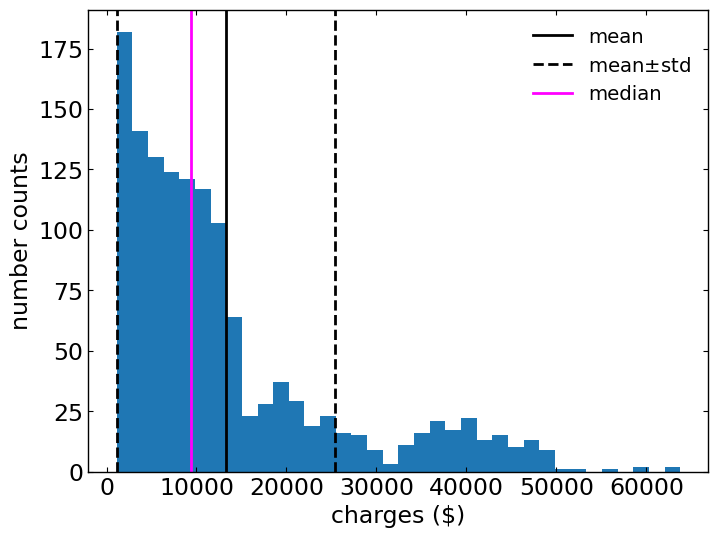

In [4]:
fig, ax = plt.subplots()

ax.hist(medical.charges, bins=int(np.sqrt(medical.charges.count())))
ax.set_xlabel('charges ($)')
ax.set_ylabel('number counts')

# calculate the mean, median, and standard deviation
smp_mean   = np.mean(medical.charges)
smp_median = np.median(medical.charges)
smp_std    = np.std(medical.charges, ddof=1)  # w/ Bessel's correction

print("mean of the sample: {:.2f} $".format(smp_mean))
print("median of the sample: {:.2f} $".format(smp_median))
print("standard deviation of the sample: {:.2f} $".format(smp_std))

ax.axvline(x=smp_mean, ls='-', lw=2, color='black', label='mean')
ax.axvline(x=smp_mean+smp_std, ls='--', lw=2, color='black', label=r'mean$\pm$std')
ax.axvline(x=smp_mean-smp_std, ls='--', lw=2, color='black')

ax.axvline(x=smp_median, ls='-', lw=2, color='magenta', label='median')

ax.legend(loc='best', fontsize='small', frameon=False)

> The distribtion of the hospital charges is highly skewed by right, so it is quite different from normal distribution. Therefore, the mean (and the range $\pm$ standard deviation) seems not useful to descirbe the statistics of the distribution. Rather median would be better in this case. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

> We can calculate the confidence interval (likely 95\% confidence level or 99\% if needs being more conservative) by using t-statistics (since we lack the population parameters). Then, we can check if the mean of 12,000 lies within the confidence interval. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

> A one-sided interval would be appropriate for this case as we only care if the mean has fallen below 12,000 or not. The t-statistics is as follows:

In [5]:
n_smp = medical.charges.count()
smp_std_err = smp_std / np.sqrt(n_smp)  # standard deviation of the sample mean

print("sample mean: $ %f"%smp_mean)
print("sample standard deviation: $ %f"%smp_std)
print("sample standard error: $ %f"%smp_std_err)

# calculate 95% margin of error -- 1-sided test
confidence_level=0.95
alpha = 1 - confidence_level
n_sided = 1 # 1-sided test
tail = 1 - alpha/n_sided

t_crit = t.ppf(tail, n_smp-1)  # degree of freedom is sample size - 1
print("exact t-critical value: {:.2f} ".format(t_crit))

moe = t_crit * smp_std_err  # margin of error
print("margin of error (95%): $ {:.2f}".format(moe))

lower_conf_bound = smp_mean - moe # lower confidence bound
print("lower bound of one-sided 95% Confidence Interval $ {:.2f}".format(lower_conf_bound))

sample mean: $ 13270.422265
sample standard deviation: $ 12110.011237
sample standard error: $ 331.067454
exact t-critical value: 1.65 
margin of error (95%): $ 544.94
lower bound of one-sided 95% Confidence Interval $ 12725.49


> The t-static shows that the lower bound of the mean value would be 12,725 dollars, which is higher than 12,000 dollars. Therefore, we can assure that the administrator should not be concerned. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

>Null       H0: people with insurance are charged the **same amount** to those without. </br>
Alernative H1: people with insurance are charged the **different amount** to those without.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [6]:
''' Calculate the value of the test statistics by manual approach '''
# separate two groups with and without insurance
noins_charge = medical.loc[medical.insuranceclaim==0, 'charges']  # without insurance
ins_charge   = medical.loc[medical.insuranceclaim==1, 'charges']  # with insurance

# mean of two groups
noins_mean = np.mean(noins_charge)
ins_mean   = np.mean(ins_charge)

# standard deviations of two groups
noins_std = np.std(noins_charge, ddof=1)  # w/ Bessel's correction
ins_std   = np.std(ins_charge, ddof=1)    # w/ Bessel's correction

# number counts of two groups
noins_n = noins_charge.count()
ins_n   = ins_charge.count()

# pooled standard deviation of the two groups
def calc_sp(n0,n1,s0,s1):
    ''' 
        n0/n1: number counts of the two groups
        s0/s1: standard deviation of the two groups
    '''
    sp = np.sqrt( ((n0-1)*s0*s0 + (n1-1)*s1*s1) / (n0+n1-2) )
    return sp

sp = calc_sp(noins_n, ins_n, noins_std, ins_std)

# t-test of thw two groups
def calc_t(x0,x1,n0,n1,sp):
    '''
        x0/x1: mean values of the two groups
        n0/n1: number counts of the two groups
        sp:    the pooled standard deviation 
    '''
    t = (x0-x1) / sp / np.sqrt(1/n0 + 1/n1)
    return t

t_test = calc_t(noins_mean, ins_mean, noins_n, ins_n, sp)
p_val  = t.cdf(t_test, df=noins_n+ins_n-2) * 2 # p-value: note that the p-value is multiplied by 2 as it is two-sided

print("===== Manual Approach =====")
print("t test statistics: {:.2f}".format(t_test))
print("p-value: {:.3g}".format(p_val))

===== Manual Approach =====
t test statistics: -11.89
p-value: 4.46e-31


In [7]:
''' Calculate the value of the test statistics by scipy.stats '''
from scipy.stats import ttest_ind as ttest

t_test_scp = ttest(noins_charge, ins_charge)

print("===== Scipy stats =====")
print("t_test results:", t_test_scp)
print("t test statistics: {:.2f}".format(t_test_scp[0]))
print("p-value: {:.3g}".format(t_test_scp[1]))


===== Scipy stats =====
t_test results: Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)
t test statistics: -11.89
p-value: 4.46e-31


> The results from two apporaches are consistent with each other. 

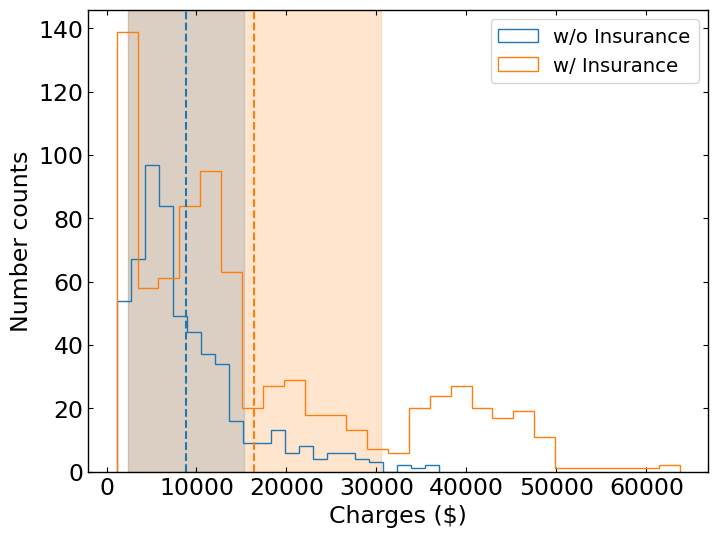

In [8]:
''' final check for the histogram of two groups '''

fig, ax = plt.subplots()

ax.hist(noins_charge, histtype='step', bins=int(np.sqrt(noins_n)), label='w/o Insurance')
ax.hist(ins_charge, histtype='step', bins=int(np.sqrt(ins_n)), label='w/ Insurance')

ax.axvline(x=noins_mean, ls='--', color='C0')
ax.axvspan(noins_mean-noins_std, noins_mean+noins_std, alpha=0.2, color='C0')  # shade for +/- 1 sigma
ax.axvline(x=ins_mean, ls='--', color='C1')
ax.axvspan(ins_mean-ins_std, ins_mean+ins_std, alpha=0.2, color='C1') # shade for +/- 1 sigma

ax.legend(loc='best', fontsize='small')

ax.set_xlabel('Charges ($)')
ax.set_ylabel('Number counts');

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

> Since z-statistics requires to infer a full population parameters rather than the statistics of samples, there is no equivalent test to t-test. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test